# 1. Introdução

O dataset que escolhemos trabalhar se chama "Heart Disease Health Indicators Dataset", provenienete da plataforma [Kaggle](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset). Como o nome sugere, essa base trás informações referentes aos indicativos de saúde à respeito de doenças ligadas ao coração. Esses dados foram coletados atráves da "Behavioral Risk Factor Surveillance System" (BRFSS) em 2015. Sendo essa uma pesquisa anual que é realizada com americanos para se obter informações relacionadas à doenças crônicas e outros fatores.

Dado esse contexto, buscamos então resolver uma tarefa de **classificação binária**, onde a classe 1 implica que a pessoa teve um ataque cardíaco, ou tem/teve uma doença no coração, e a classe 0 implica o caso contrário.

## 1.1. Leitura dos dados

In [2]:
import pandas as pd
heart_disease = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart_disease

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Percebe-se que ao todo, são **253.680 instâncias** cada uma com **21 atributos** e **1 rótulo binário**.

# 2. Análise Exploratória dos Dados (EDA)

Verifiquemos então a natureza desses dados:

In [2]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Percebe-se que todos os dados são *númericos* e nenhum atributo apresenta *dados faltantes*.

Vejamos agora as estatísticas referentes a cada atributo:

In [3]:
heart_disease.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


A quantidade de instâncias da classe 0 aparenta ser superior às da classe 1, isso devido ao *terceiro quartil* ser 0. Façamos uma visualização dessas quantidades atráves de um gráfico de barra.

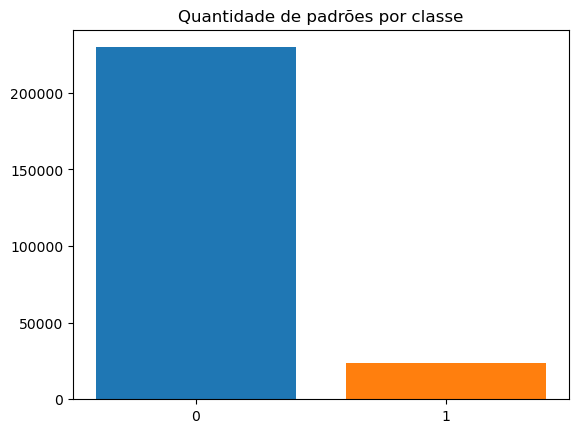

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([0, 1])
y = np.array([heart_disease["HeartDiseaseorAttack"].value_counts()[0], heart_disease["HeartDiseaseorAttack"].value_counts()[1]])

plt.bar(x, y, tick_label = x, color=["C0", "C1"])
plt.title("Quantidade de padrões por classe")
plt.show()

In [5]:
print(f"Padrões referentes a classe 0: {y[0]}")
print(f"Padrões referentes a classe 1: {y[1]}")
print(f"Porcentagem dos padrões referentes a classe positiva comparadas ao todo: {y[1]/y.sum() * 100:.2f}%")

Padrões referentes a classe 0: 229787
Padrões referentes a classe 1: 23893
Porcentagem dos padrões referentes a classe positiva comparadas ao todo: 9.42%


Portanto, é necessária aplicação de uma técnica de amostragem com relação às classes, podendo ser essa uma **subamostragem (ou undersampling)** e/ou **sobreamostragem (ou oversampling)**.

Analisemos agora os valores referentes aos atributos. Da fonte dos dados, tem-se que eles assumem valores binários ou discretos, sendo suas descrições:

*   HighBP (High Blood Pressure): Alta pressão sanguínea? (Dado binário)
*   HighChol (High Cholesterol): Colesterol alto? (Dado binário)
* CholCheck (Cholesterol Check): Colesterol checado? (Dado binário)
* BMI (Body Mass Index): Índice de Massa Corporal. (Dado contínuo)
* Stroke: Já teve AVC? (Dado binário)
* Smoker: Fumante? (Dado binário)
* Diabetes: Tem diabetes? Qual tipo? (Dado discreto)
* PhysActivity (Physics Activity): Prática Atividade física? (Dado binário)
* Fruits: Consome frutas? (Dado binário)
* Veggies: Consome vegetais? (Dado binário)
* HvyAlcoholConsump (Heavy Alcohol Consumption): Consumo alcólico pesado? (Dado binário)
* AnyHealthcare: Algum seguro de vida? (Dado binário)
* NoDocbcCost (No Doctor because Cost): Não pôde visitar um médico por conta de custos? (Dado binário)
* GenHlth (General Health): De 1 (excelente) a 5 (ruim), qual o nível de sua saúde geral? (Dado discreto)
* Menthlth (Mental Health): Nós últimos 30 dias, quantos deles foi apresentado um estado ruim de saúde mental? (Dado discreto)
* PhysHlth (Physical Health): Nós últimos 30 dias, quantos deles foi apresentado um estado ruim de saúde física? (Dado discreto)
* DiffWalk (Difficuty to Walk): Dificuldade para andar? (Dado binário)
* Sex: Gênero da pessoa, 0 sendo feminino e 1 masculino. (Dado binário)
* Age: Classe de idade da pessoa, onde 1 é entre 18 e 24 anos e vai até 13 intervalos, onde esse último representa aqueles com 80 anos ou mais (cada intervalo varia de 5 em 5 anos). (Dado discreto)
* Education: Nível de escolaridade indo de 0 (nunca foi a uma escola) a 6 (tendo 4 anos de faculdade ou mais). (Dados discreto)
* Income: Indica o total de ganhos, indo de 1 (no mínimo \$10000) até 6 (mais de \$75000).


Visualizando as distribuições por meio de histogramas, tem-se:



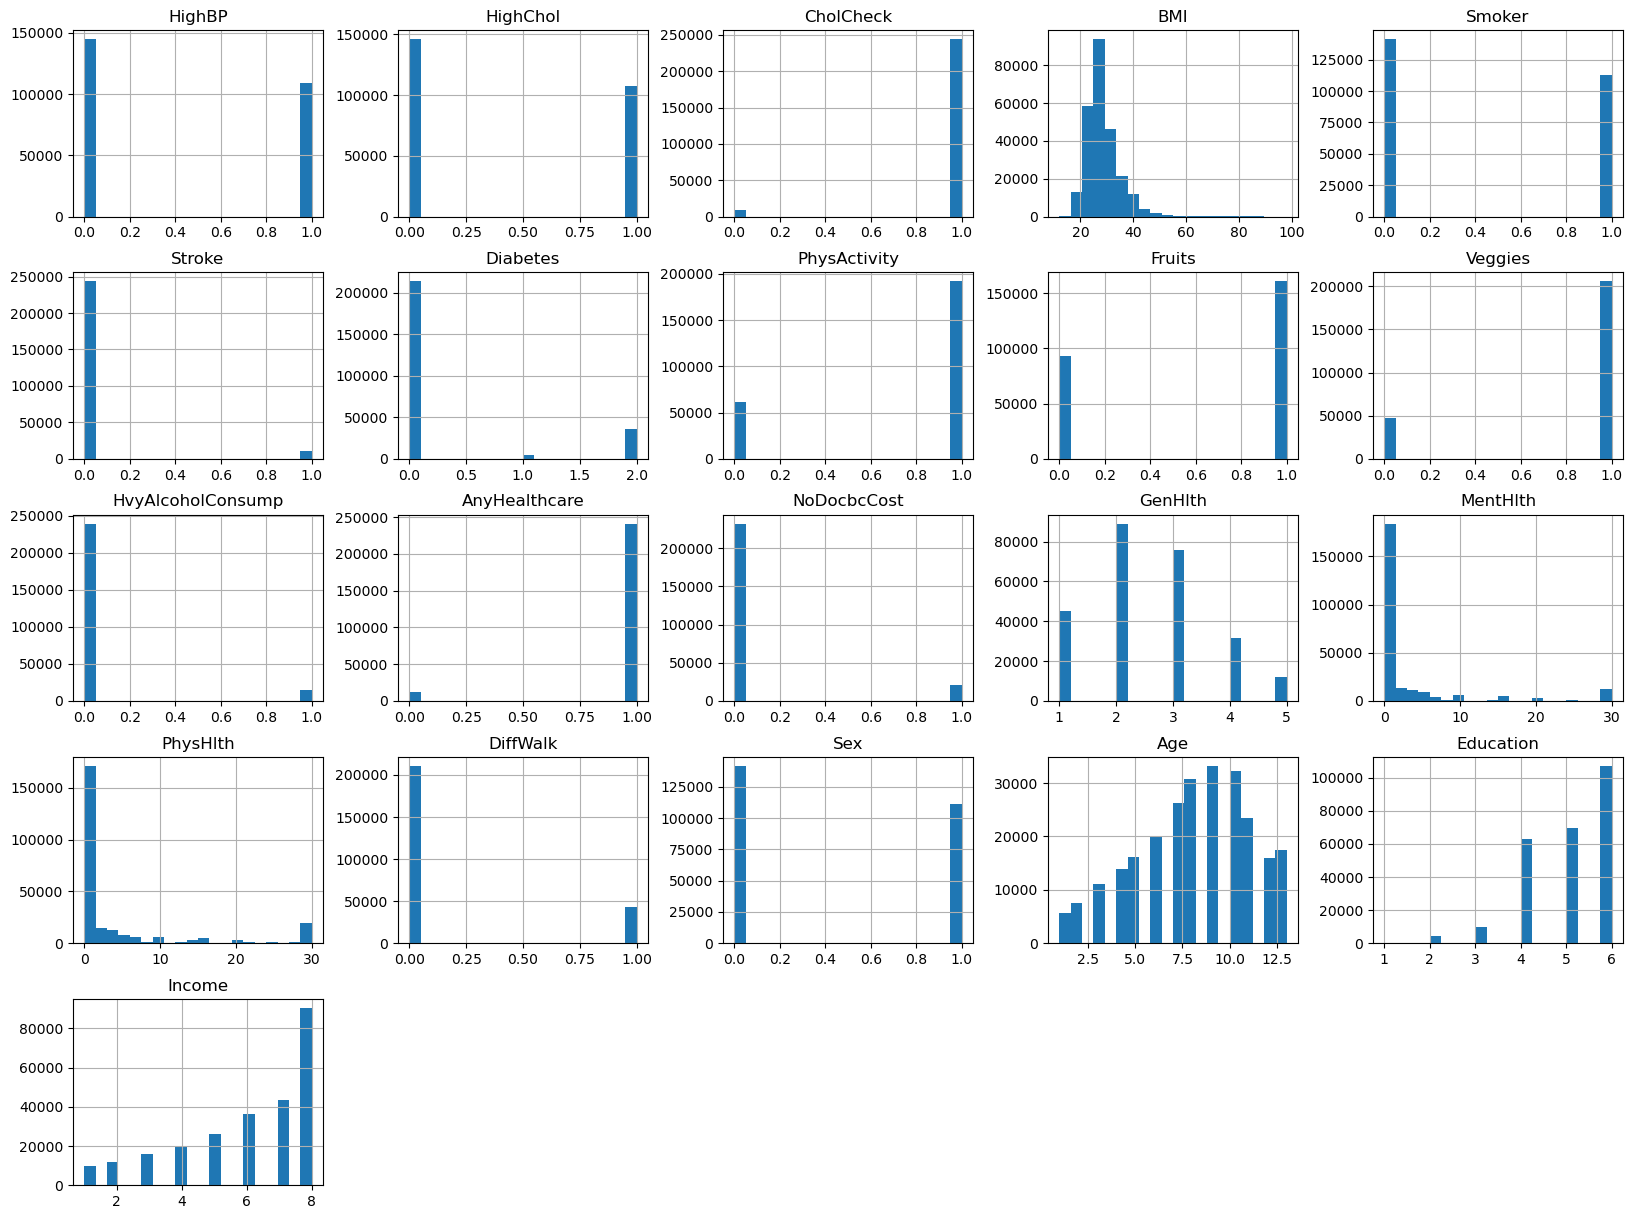

In [6]:
heart_disease.drop("HeartDiseaseorAttack", axis=1).hist(bins=20,figsize=(20,15))
plt.show()

Algumas observações podem ser feitas:

* Pela grande quantidade de atributos binários, talvez seja interessante considerar uma padronização de todos os atributos para valores entre 0 e 1 (*MinMaxScaler*)

* Alguns atributos possuem seus valores concentrados em um único valor, por exemplo: `DiffWalk` (maioria concentrada em 0), `AnyHealthcare` (maioria concentrada em 1), `Diabetes` (maioria concentra em 0) e outros.

Vamos trabalhar agora com as relações entre os próprios atributos. Para isso, calcularemos o **coeficiente de correlação de Pearson** para cada par de atributos.

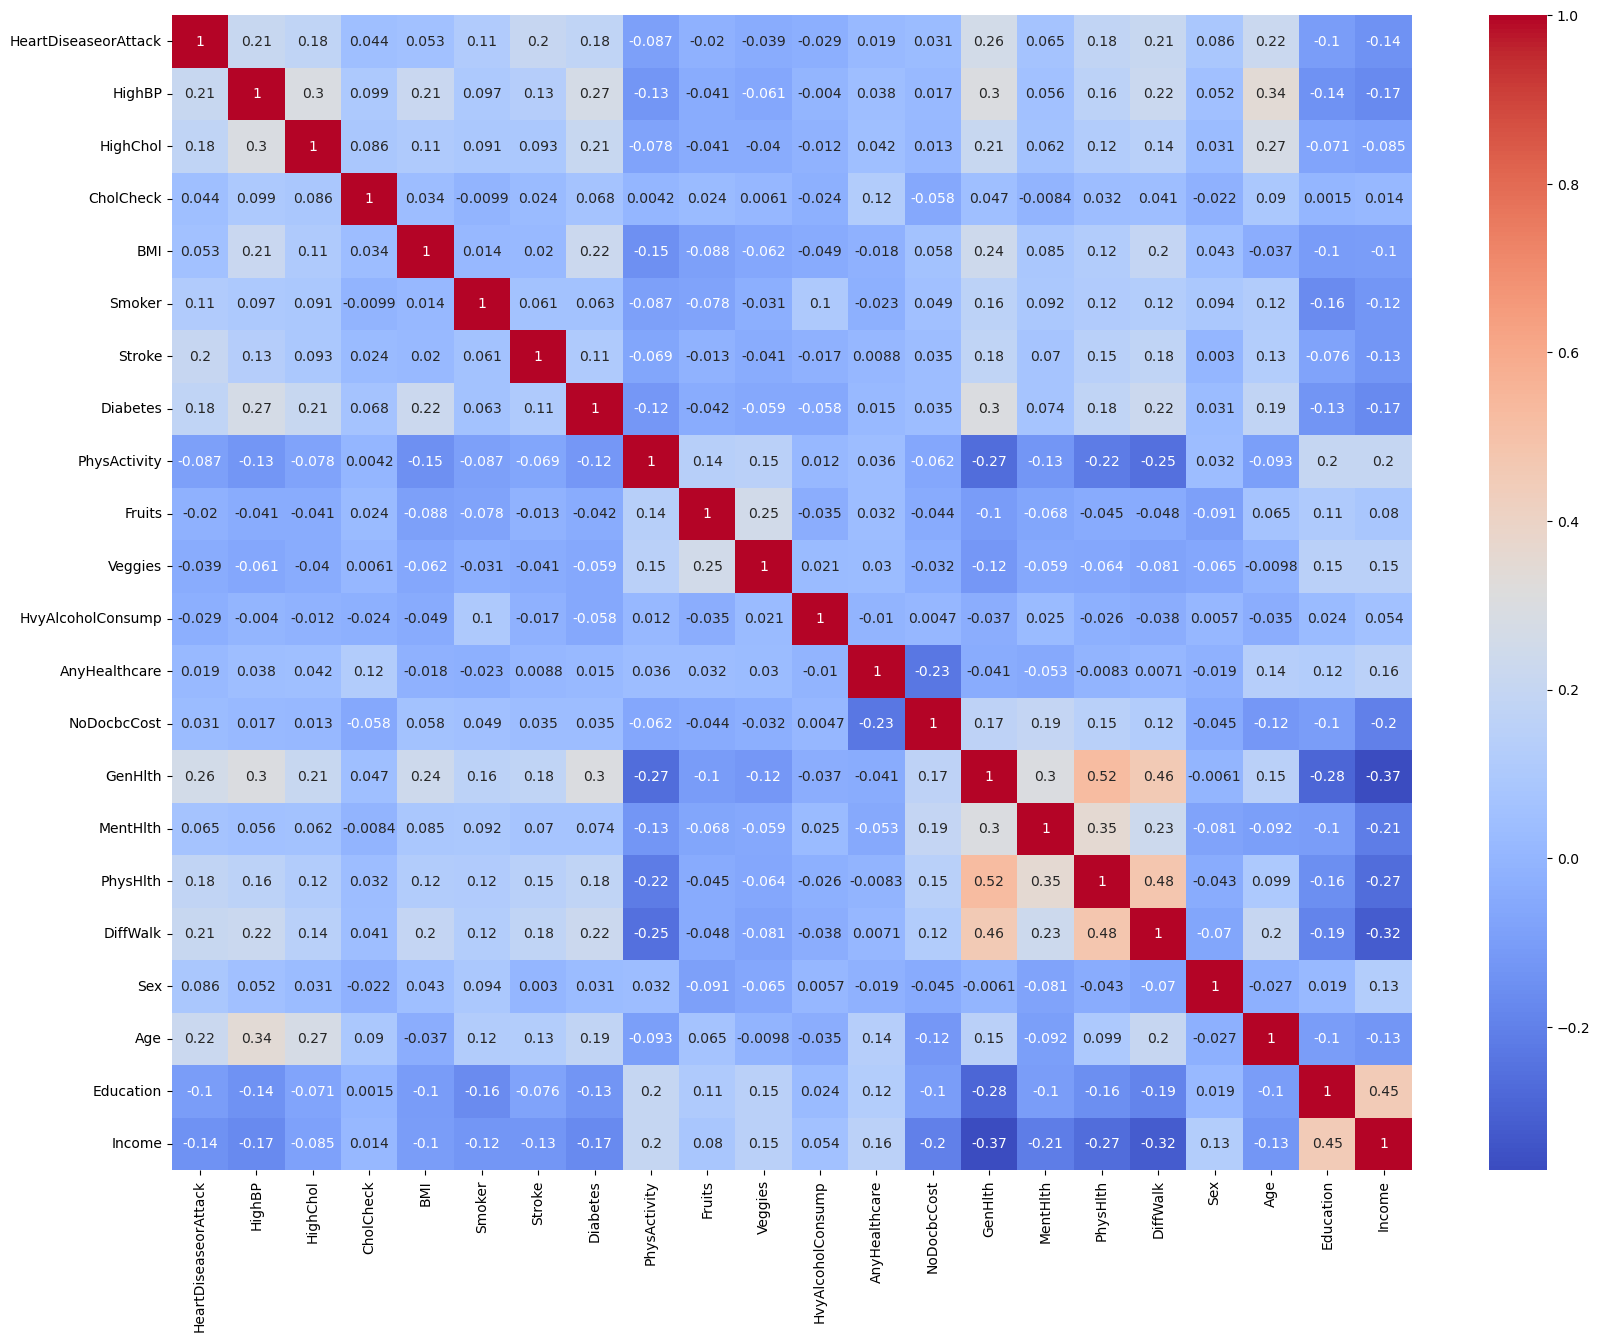

In [7]:
plt.figure(figsize=(20,15))
corr_matrix = heart_disease.corr()
sns.heatmap(data=corr_matrix, cmap=plt.get_cmap("coolwarm"), annot=True)
plt.show()

Nos concetraremos mais à respeito do nosso atributo alvo, `HeartDiseaseorAttack`.

In [8]:
corr_matrix["HeartDiseaseorAttack"].sort_values(ascending=False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

Podemos observar quê:

* Existe uma correlação fraca e positiva com os atributos: `GenHealth`, `Age`, `DiffWalk`, `HighBP`, `Stroke`, `PhysHlth`, `HighChol` e `Diabetes`. Indicando que pessoas com essas características altas tendem a uma maior chance de desenvolver doenças ou ataques do coração. O que aparenta ser bastante coerente.
  * Quanto maior o `GenHealth`, pior é o nível de saúde da pessoa, mais propensa a doenças cardíacas.
  * Quanto maior o `Age`, mais velha é a pessoa, mais propensa a ataques cardíacos.
  * Se a pessoa possue o atributo `DiffWalk` como 1, indica que a pessoa não consegue andar sem muita ajuda, podendo indicar um má circulação do sangue na pessoa, indicando assim também, uma maior propensão a ataques/doenças cardíacas.
  *  Se a pessoa possue o atributo `HighBP` como 1, indica que a pessoa apresenta uma alta pressão sanguínea, indicando maiores chances da pessoa desenvolver uma doença/ataque no coração.
  *  Se a pessoa possue o atributo `Stroke` como 1, indica que a pessoa apresentou um AVC, podendo esse fator acarretar em outras mazelas relacionadas ao coração.
  * Quanto maior o `PhysHlth`, pior é o estado físico de saúde da pessoas, de forma similar ao `GenHealth`
  *  Se a pessoa possue o atributo `HighChol` como 1, indica que pior é os níveis de colesterol da pessoa, sendo um fator forte de ocorrências de ataques/doenças cardíacas.
  *  Se a pessoa possue o atributo `Diabetes` como 1 ou 2, indica uma maior propensão da pessoa adquirir alguma doença cardíaca.  
* Existe uma correlação fraca e negativa com relação ao atributo `Income`. Uma possível interpretação para esse fato, pode ser devido a pessoas com alto poder aquisitivo terem condições de manter uma rotina de vida saudável. Consumindo produtos (maioria das vezes de preços elevados) que não são tão prejudiciais a saúde. Sendo assim, quanto maior a renda, menos propensa é a pessoa a desenvolver uma doença/ataque do coração.

# 3. Pré-processamento dos dados

Feita essa análise mais criteriosa à respeito dos dados que estamos tratando, iremos agora realizar as transformações necessárias para tornar esses dados "consistentes" ao modelo. Mas antes, devido ao desbalanceamento entre as classes, realizaremos uma amostragem estratificada nos conjuntos de treino e teste.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

X = heart_disease.drop("HeartDiseaseorAttack", axis=1)
y = heart_disease["HeartDiseaseorAttack"]

amostrador = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in amostrador.split(X, y):
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

Prepararemos então uma pipeline de pré-processamento. Dado a análise já feita, sabemos que os valores que estamos trabalhando são todos discretos, com alguns deles sendo ordinais, motivando então uma normalização via `MinMaxScaler`.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline_pre_proc_sub = Pipeline(steps=[
    ("Normalizador", MinMaxScaler())
])

Por fim, é necessário um tratamento com relação ao desbalanceamento de classes. Iremos adotar a estratégia de `undersampling` via `RandomUndersampling`, a qual consiste na remoção aleatória de instâncias pertecentes a classe majoritária até o número de ambas as classes serem iguais.

In [5]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler

subamostrador = RandomUnderSampler(sampling_strategy="majority", random_state=42, replacement=False)
X_train_subamostrado, y_train_subamostrado = subamostrador.fit_resample(X_train, y_train)
pipeline_pre_proc_sub.fit(X_train_subamostrado)

Pipeline(steps=[('Normalizador', MinMaxScaler())])

In [12]:
print("Proporção das classes de treinamento")
y_train_subamostrado.value_counts()

Proporção das classes de treinamento


HeartDiseaseorAttack
0.0    19114
1.0    19114
Name: count, dtype: int64

# outra abordagem

In [13]:
idx_total = X_train.index
idx_in = pd.Index(subamostrador.sample_indices_)
idx_out = idx_total.difference(idx_in)

idxs_zero = y_train[idx_out][y_train[idx_out] == 0].index

X_0 = X_train.loc[idxs_zero]
y_0 = y_train.loc[idxs_zero]

In [14]:
y_0.value_counts()

HeartDiseaseorAttack
0.0    156140
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

RL_model = LogisticRegression(random_state=42, n_jobs=-1)

acc = np.empty(157)
prec = np.empty(157)
recall = np.empty(157)


for i in range(1, 158):
  X_aux = pd.concat([X_train_subamostrado, X_0[0:i*1000]], axis=0)
  y_aux = pd.concat([y_train_subamostrado, y_0[0:i*1000]])
  RL_model.fit(X_aux, y_aux)
  y_pred = RL_model.predict(X_test)
  acc[i-1] = accuracy_score(y_test, y_pred)
  prec[i-1] = precision_score(y_test, y_pred)
  recall[i-1] = recall_score(y_test, y_pred)


KeyboardInterrupt: 

In [ ]:
x = np.arange(1, 158)
plt.plot(x, acc, label="Acurácia", c="blue")
plt.plot(x, prec, label="Precisão", c="red")
plt.plot(x, recall, label="Revocação", c="purple")
plt.title("Desempelho do modelo RL a medida que é treinado com mais exemplos da classe 0")
plt.ylabel("Valor da métrica")
plt.xlabel("Quantidade de exemplos inseridos por mil")
plt.legend()
plt.show()

In [ ]:
print("============ Acurácia ============")
print(f"Melhor acurácia: {acc.max():.2f}")
print(f"Pior acurácia: {acc.min():.2f}")

print("============ Precisão ============")
print(f"Melhor precisão: {prec.max():.2f}")
print(f"Pior precisão: {prec.min():.2f}")

print("============ Revocação ============")
print(f"Melhor revocação: {recall.max():.2f}")
print(f"Pior revocação: {recall.min():.2f}")

# 4. Construção do modelo
Para a tarefa de classificar o dataset escolhido, usaremos os modelos de Random Forest Classifier, K-NN e Multilayer Perceptron, todos algoritmos de classificação.

## 4.1. Random Forest Classifier
Começaremos com a Floresta Aleatória. Nesse algoritmo, treinamos várias árvores de decisão, cada uma com um subconjunto aleatório diferente do conjunto de treinamento. No fim, com as previsões individuais de cada árvore, o modelo prevê a classe que obteve mais votos. Pensamos que este possa ser um bom modelo para o dataset escolhido pois é um algoritmo de classificação apto para problemas binários como o escolhido, não é tão sucetível ao overfitting como Árvore de Decisão e trabalha com o Bagging, treinando cada árvore de decisão em paralelo, sendo computacionalmente bom.

Para otimizarmos os hiperparâmetros do modelo, utilizaremos o GridSearch, um algoritmo que testa exaustivamente todas as combinações possíveis de valores de hiperparâmetros especificados em uma grade (ou matriz), avaliando o desempenho de cada combinação em termos de uma métrica definida. No nosso caso, será o recall.

Como estamos trabalhando com Florestas Aleatórias (e consequentemente, árvores de decisão), não precisaremos utilizar a pipeline para normalizar os dados, pois as árvores de decisão não são sensíveis à escala dos dados.

Melhores parâmetros: {'max_depth': 5, 'max_leaf_nodes': 8, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 42}


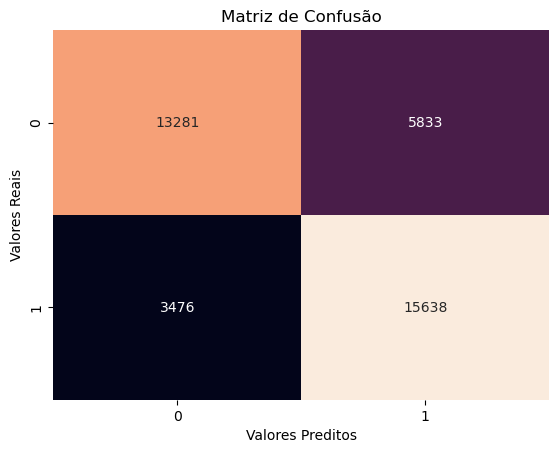

============= MÉTRICAS SIMPLES =============
Acurácia: 0.76
Precisão: 0.73
Revocação: 0.82
F1-score: 0.77


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[200,300],
              'max_leaf_nodes':[2,4,8],
              'max_depth':[5,7,9],
              'random_state':[42],
              'n_jobs':[-1]}
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, scoring='recall')

clf.fit(X_train_subamostrado, y_train_subamostrado)

print(f"Melhores parâmetros: {clf.best_params_}")

y_pred = clf.predict(X_train_subamostrado)

cm = confusion_matrix(y_train_subamostrado, y_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='.0f')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

print("============= MÉTRICAS SIMPLES =============")
rf_accuracy = accuracy_score(y_train_subamostrado, y_pred)
print(f"Acurácia: {rf_accuracy:.2f}")

rf_precision = precision_score(y_train_subamostrado, y_pred)
print(f"Precisão: {rf_precision:.2f}")

rf_recall = recall_score(y_train_subamostrado, y_pred)
print(f"Revocação: {rf_recall:.2f}")
print("============================================")
rf_f1 = f1_score(y_train_subamostrado, y_pred)
print(f'F1-score: {rf_f1:.2f}')

Utilizando o conjunto subamostrado com o RandomUnderSampler, vemos que os melhores parâmetros foram os que maximizaram o número de nós-folha e estimadores, e a menor profundidade. Vemos que ao treinar e prever os resultados usando o conjunto de treino tivemos um ótimo resultado para o recall (revocação) e ao mesmo tempo uma boa precisão.

Partindo agora para fazer o predict dos dados de teste:

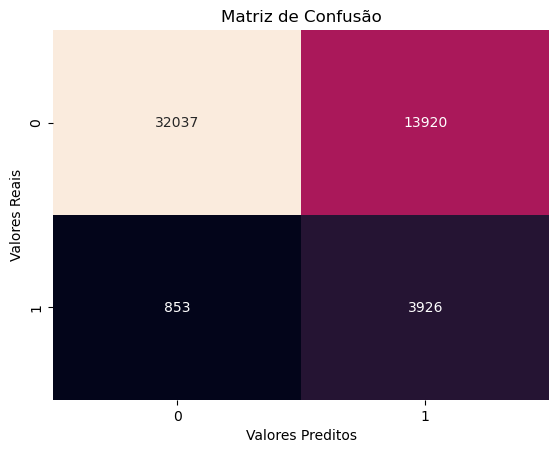

============= MÉTRICAS SIMPLES =============
Acurácia: 0.71
Precisão: 0.22
Revocação: 0.82
F1-Score: 0.35


In [17]:
from sklearn.metrics import auc, roc_curve, average_precision_score

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='.0f')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

print("============= MÉTRICAS SIMPLES =============")
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {model_accuracy:.2f}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão: {precisao:.2f}")

revocacao = recall_score(y_test, y_pred)
print(f"Revocação: {revocacao:.2f}")
print("============================================")
# F1-Score
f1 = f1_score(y_test, y_pred)
y_proba = clf.predict_proba(X_test)[:, 1]
print(f"F1-Score: {f1:.2f}")

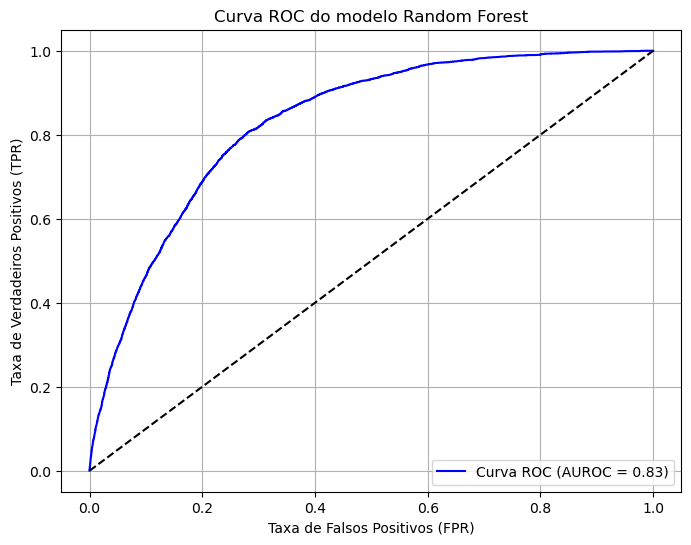

In [18]:
# Curva ROC
fpr, tpr, t = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUROC = {auc_score:.2f})", color="b")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC do modelo Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

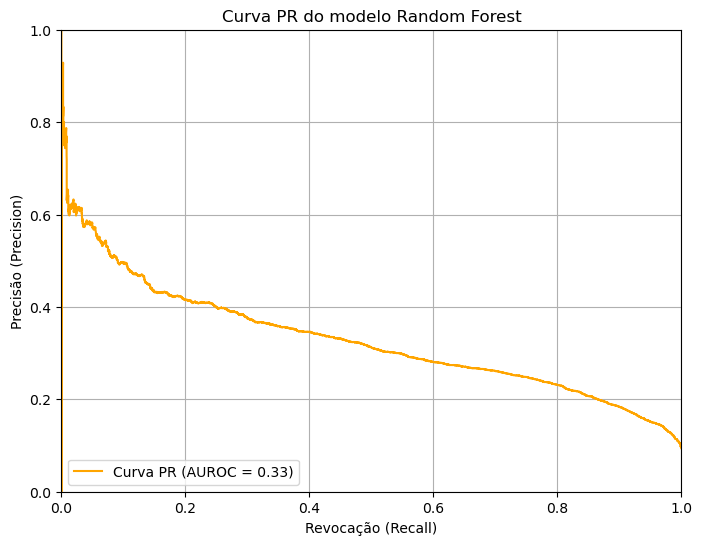

In [19]:
# Curva PR
precision, recall, t = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"Curva PR (AUROC = {ap_score:.2f})", color="orange")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Revocação (Recall)")
plt.ylabel("Precisão (Precision)")
plt.title("Curva PR do modelo Random Forest")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Analisando a matriz de confusão e as métricas obtidas a partir dela, vemos que provavelmente tivemos um overfitting na predição das labels do conjunto de testes. Já no nosso conjunto de testes, o que ocorre aqui é que tivemos um ótimo recall, como queríamos, mas um valor baixo de precisão, o que indica que estamos minimizando bem os falsos negativos mas estamos tendo bastante falsos positivos. Veremos mais adiante no playbook as teorias para esse fenômeno.

No geral, para o nosso propósito de inferir corretamente os pacientes com algum problema no coração ou vítimas de um ataque cardiáco, o Random Forest teve um resultado razoavelmente satisfatório.

#4.2. KNN

Acurácia: 0.72
Precisão: 0.21
Revocação: 0.75


<Axes: >

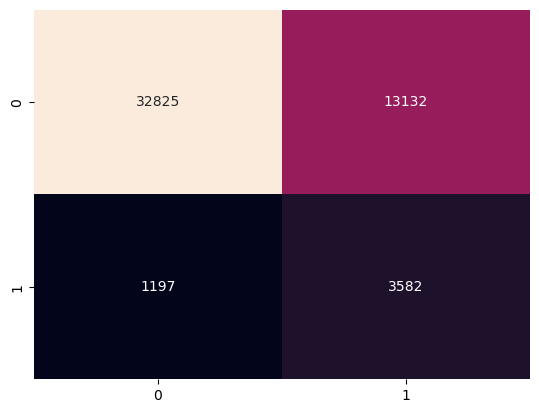

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

X_train_normalizado = pipeline_pre_proc_sub.transform(X_train_subamostrado)
knn.fit(X_train_normalizado, y_train_subamostrado)

X_test_normalizado = pipeline_pre_proc_sub.transform(X_test)
y_pred = knn.predict(X_test_normalizado)

knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {knn_accuracy:.2f}")

knn_precision = precision_score(y_test, y_pred)
print(f"Precisão: {knn_precision:.2f}")

knn_recall = recall_score(y_test, y_pred)
print(f"Revocação: {knn_recall:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='.0f')

#4.3. Multi-layer Perceptron

Para implementarmos o **Multi-layer Perceptron** precisamos considerar os diferentes hiperparâmetros que podemos passar para a função buscando o seu melhor *rendimento*.

Uma forma de buscar quais as melhores configurações, é aplicando o `GridResearchCV`, uma técnica que vai avaliar os resultados de diferentes parâmetrizações do MLP.

Como definido pelo pré-processamento de dados, vamos fazer o treino tanto do Grid quanto do MLP com os dados normalizados subamostrados:

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#Pegando os dados pre-processados, em vistude tamém do tempo de processamento
X_train_sub = pipeline_pre_proc_sub.transform(X_train_subamostrado)

#Inicializando o classificador do MLP, sendo já max_inter=1000 um bom parâmetro para limitar as iterações
mlp_c = MLPClassifier(max_iter=1000)

#Inicializando o GridSearch
param_busca={ 'learning_rate_init': [0.1, 0.01],
              'hidden_layer_sizes': [(50,), (50, 50), (100, 50, 25)],
              'alpha': [0.0001, 1e-5]}
#clf_sub = GridSearchCV(mlp_c, param_busca)
clf_sub = GridSearchCV(mlp_c, param_busca)

#Vamos agora treinar o gridsearch
clf_sub.fit(X_train_sub, y_train_subamostrado)


print("Melhor LR:", clf_sub.best_params_)
print("Score: \n", clf_sub.score)

**Recebemos do GridReserchCV** a melhor configuração para o nosso modelo, que foram *('alpha': 1e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1)*. O 'solver = adam' e a 'activation : relu' são escolhas naturais, pois são mais indicada para grande conjuntos de dados e a função mais utilizada para ativação, respectivamente.

Finalmente, implementamos nossa MLP com esses parâmetros:

In [12]:
from sklearn.neural_network import MLPClassifier
#Inicializando o classificador do MLP para cada dado normalizado
mlp_class = MLPClassifier(max_iter=1000, activation='relu', solver = 'adam',
                              alpha=1e-05, hidden_layer_sizes=(50,50), learning_rate_init=0.1)
#Pegando os dados pre-processados, em vistude tamém do tempo de processamento
X_train_sub = pipeline_pre_proc_sub.transform(X_train_subamostrado)

#MLP para os dados subamostrados:
mlp_class.fit(X_train_sub, y_train_subamostrado)

#Vamos testar o modelo com nossos dados subamostrados
y_pred_sub = mlp_class.predict(X_test)


#Print das precisões e revocações
mlp_accuracy = accuracy_score(y_test, y_pred_sub)
mlp_precision = precision_score(y_test, y_pred_sub)
mlp_recall = recall_score(y_test, y_pred_sub)
print("Acurácia do MLP com dados subamostrados:", mlp_accuracy)
print("Precisão do MLP com dados subamostrados:", mlp_precision)
print("Revocação do MLP com dados subamostrados:", mlp_recall)

Acurácia do MLP com dados subamostrados: 0.14202932828760642
Precisão do MLP com dados subamostrados: 0.09882601403813901
Revocação do MLP com dados subamostrados: 0.9987445072190835


# 5. Conclusões

Alguns pontos importantes que podemos destacar são:

1. Desbalanceamento das Classes: Observamos um desbalanceamento significativo entre as classes, com a classe 0 (ausência de doença cardíaca) sendo muito mais prevalente que a classe 1 (presença de doença cardíaca). Isso nos levou a considerar técnicas de amostragem para balancear os dados.
2. Correlação entre Atributos: A análise de correlação revelou que atributos como GenHealth, Age, DiffWalk, HighBP, Stroke, PhysHlth, HighChol e Diabetes têm uma correlação positiva com a presença de doenças cardíacas. Por outro lado, o atributo Income mostrou uma correlação negativa, sugerindo que pessoas com maior renda têm menor propensão a desenvolver doenças cardíacas.
3. Pré-processamento: Implementamos uma pipeline de pré-processamento utilizando MinMaxScaler para normalizar os dados, o que é essencial para garantir que os modelos de machine learning possam aprender de maneira eficiente.
4. Visualizações: Utilizamos diversas visualizações, como histogramas e heatmaps, para entender melhor a distribuição dos dados e as relações entre os atributos.

## 5.1 Avaliação do desempenho dos modelos

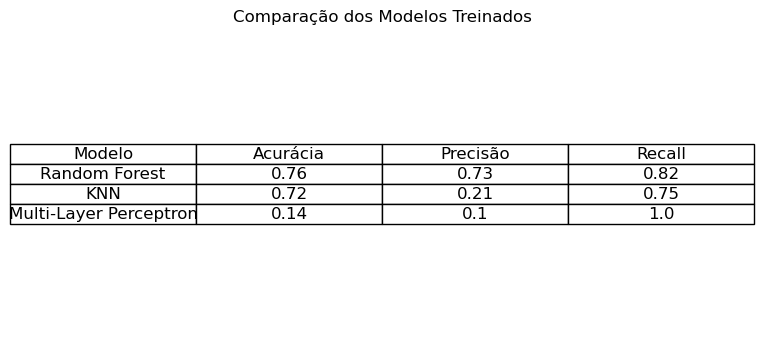

In [18]:
resultados = {
    'Modelo': ['Random Forest', 'KNN', 'Multi-Layer Perceptron'],
    'Acurácia': [rf_accuracy, knn_accuracy, mlp_accuracy],
    'Precisão': [rf_precision, knn_precision, mlp_precision],
    'Recall': [rf_recall, knn_recall, mlp_recall], 
}

df_resultados = pd.DataFrame(resultados)

df_resultados = df_resultados.round(2)

fig, ax = plt.subplots(figsize=(8, 4))

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_resultados.values, colLabels=df_resultados.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Comparação dos Modelos Treinados')
plt.show()

Nota-se claramente que o desempenho do modelo que implementou **Random Forest foi superior** aos demais, vários fatores podem justificar tal situação, entre eles vale citar:
- **Diversidade de Atributos**: O dataset contém uma mistura de atributos binários, discretos e contínuos. A Random Forest é capaz de lidar bem com diferentes tipos de dados sem a necessidade de muita engenharia de atributos.
- **Capacidade de Capturar Interações Complexas**: A Random Forest pode capturar interações complexas entre os atributos, como a combinação de fatores de risco que podem levar a doenças cardíacas.
- **Redução de Overfitting**: A Random Forest reduz o risco de overfitting em comparação com modelos mais simples, como árvores de decisão únicas, especialmente em datasets com muitos atributos.

Analisando o desempenho do modelo que implementou o KNN podemos observar que ele teve uma boa acurácia, porém uma baixa precisão, isso pode ter sido causado pelo desbalanciamento do dataset, o KNN pode classificar muitas instâncias como pertencentes à classe majoritária para maximizar a acurácia, resultando em muitos falsos positivos.

Outra observação interessante é o overfitting no modelo que implementou o **Multi-Layer Perceptron**, o modelo obteve uma acurácia ruim e uma precisão pior, é provável que o modelo tenha um desempenho ruim em dados não vistos, além de que um dos fatores que pode ter contribuído para essa situação tenha sido o desbalanceamento antes mencionado.